## Imports

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from pathlib import Path

## Load dataset

In [11]:
path = Path().cwd()
data_file = "Data/Actors.csv"

T = pd.read_csv(data_file, delimiter = ",")
# One hot encoding of actor
# This is unfortuanate necessary because sklearn only handles numerical features
T = pd.get_dummies(T,prefix=['Actor'])

### 1. The first few exercises concern the fictitious movie dataset below. A real database with information on movies and TV-series is available in different formats from http://www.imdb.com/interfaces. The goal here is to predict the user rating of an upcoming movie as soon as the information on cast and budget is known, and to be able to explain in words why the movie will go straight to the Oscar's - or straight to oblivion.

| Observation  | Actor               | Budget ($ million)  | IMDB User Rating  |
|------        |------               |------               |------             |
| 1            | Nicholas Cage       | 100                 | 2.8               |
| 2            | Scarlett Johanson   |  50                 | 8.3               |
| 3            | Scarlett Johanson   | 150                 | 4.0               |
| 4            | Nicholas Cage       |  20                 | 2.9               |
| 5            | Al Pacino           |  75                 | 7.8               |
| 6            | Al Pacino           | 150                 | 8.1               |
| 7            | Al Pacino           | 115                 | 3.0               |
| 8            | Nicholas Cage       | 115                 | 3.0               |

> a) Is the described problem a classification or regression problem? Motivate your answer.

The described problem is a regression problem since there are a continuous number of possible outcome to predict for a given movie's rating.

> b) Which input variables are categorical and which are continuous?

Actor is categorical and and Budget is continuous.

> c) For a categorical variable with k unique categories, what is the number of possible splits into two groups? Note that empty groups are not allowed, and that groupings are commutative in the sense that e.g. the split $\{1,2,3\},\{4,5\}$ is equal to the split $\{4,5\},\{1,3,2\}$.


For a categorical variable with \( k \) unique categories, the number of possible splits into two groups is given by the formula:

$ 2^{(k-1)} - 1 $ 

This formula accounts for all possible non-empty groupings, considering that groupings are commutative.

> d) What is the total number of splits to investigate at the root node for the movie dataset?

At the root node we can split either in the categorial "Actor" variable or continuous "Budget" variable. Split at "Budget" variable we have a total of 8-1=7 possible splits. Moreover, we have two pairs of observations which have the same "Budget", this reduces the number of possible splits by 2 down to 5 possible splits. If we split the categorial "Actor" we know from exercise c that there is 3 possible splits. 
Therefore the total number of slipts to check in the root node is 5+3=8.

> e) Build a tree that predicts IMDb ratings.

In [21]:
# create a decisiontreeregressor/classifier
dtree = DecisionTreeRegressor()
# Fit the tree regressor/classifier
dtree.fit(T[['Actor_SJ', 'Actor_NC', 'Actor_AP', 'Budget']], T['IMDb'])

DecisionTreeRegressor()

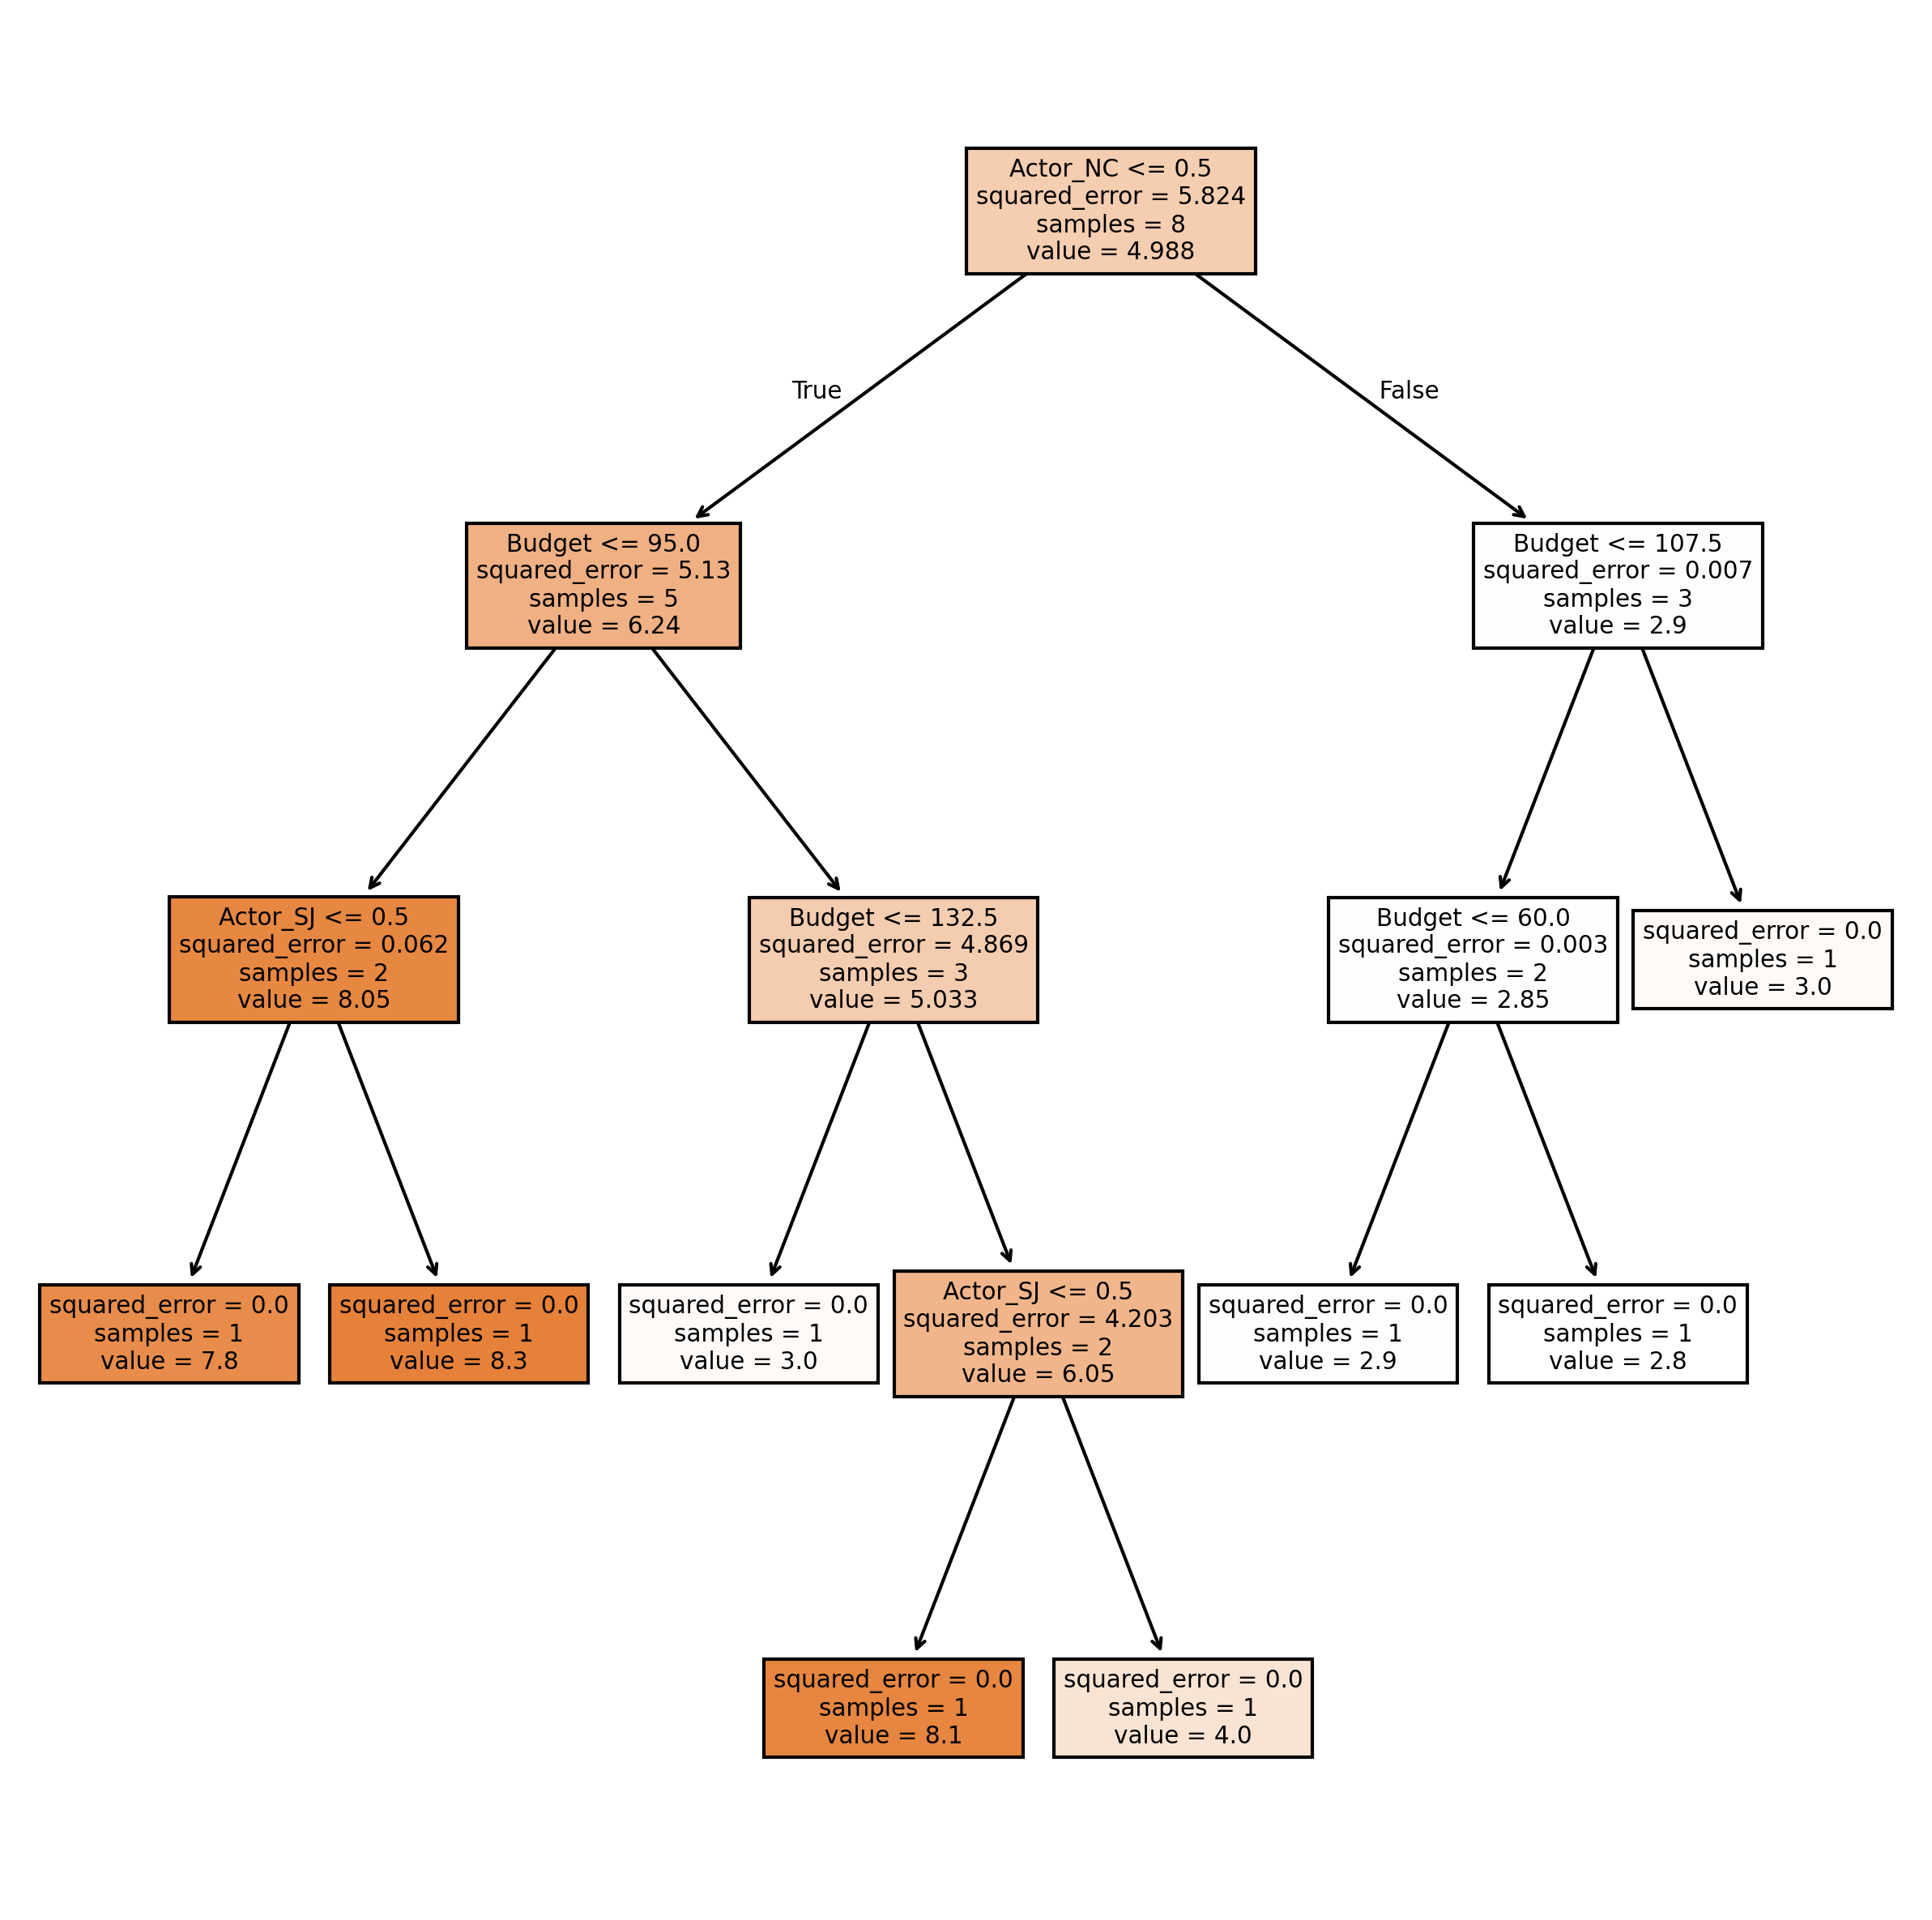

In [20]:
feature_names=['Actor_SJ', 'Actor_NC', 'Actor_AP', 'Budget']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(dtree,
               feature_names = feature_names,
               filled = True);